## Day-2 of LogisticRegression

### 1. Importing Necessary Libraries 

In [139]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# switching the directory to the location of dataset
os.chdir("c:/Users/YASH/AI,ML book/90-day-project-based-hands-on-machine-learning/day-02-Logistic-Regression")

### 2. Load Dataset

In [140]:
performance_df = pd.read_csv("StudentsPerformance.csv")
performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [141]:
print(f"Shape of dataset:{performance_df.shape}")

Shape of dataset:(1000, 8)


### 3. Data Preprocessing

In [142]:
print("\n info about dataset:")
performance_df.info()


 info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [143]:
# checking for missing values
print("\n Missing values in each column:")
print(performance_df.isnull().sum())


 Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [144]:
# Checking for duplicate rows
duplicate_rows = performance_df.duplicated().sum()
print(f"\n Number of duplicate rows in the dataset: {duplicate_rows}")


 Number of duplicate rows in the dataset: 0


In [145]:
# statistical information about dataset
print("\n Statistical information about dataset:")
print(performance_df.describe())


 Statistical information about dataset:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [146]:
# gender
print(performance_df['gender'].value_counts())


gender
female    518
male      482
Name: count, dtype: int64


In [147]:
# parent's education
print(performance_df['parental level of education'].value_counts())

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [148]:
# Test preparation course
print(performance_df['test preparation course'].value_counts())

test preparation course
none         642
completed    358
Name: count, dtype: int64


### 4. Feature Engineering

In [149]:
# total score
performance_df['total score'] = performance_df['math score']+performance_df['reading score']+performance_df['writing score']
print(performance_df['total score'])

# percentage
performance_df['percentage'] = performance_df['total score'] / 300 * 100
print(performance_df['percentage'])

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total score, Length: 1000, dtype: int64
0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: percentage, Length: 1000, dtype: float64


In [150]:
# Grade
performance_df['grade'] = performance_df['percentage'].apply(lambda x: 'A' if x >= 90 else 'B' if x >= 80 else 'C' if x >= 70 else 'D' if x >= 60 else 'E'if x >= 30 else 'F')

In [151]:
performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C


### 5. Data Exploration

In [152]:
# Check grade distribution
print("Grade Distribution:")
print(performance_df['grade'].value_counts().sort_index())


Grade Distribution:
grade
A     52
B    146
C    261
D    256
E    276
F      9
Name: count, dtype: int64


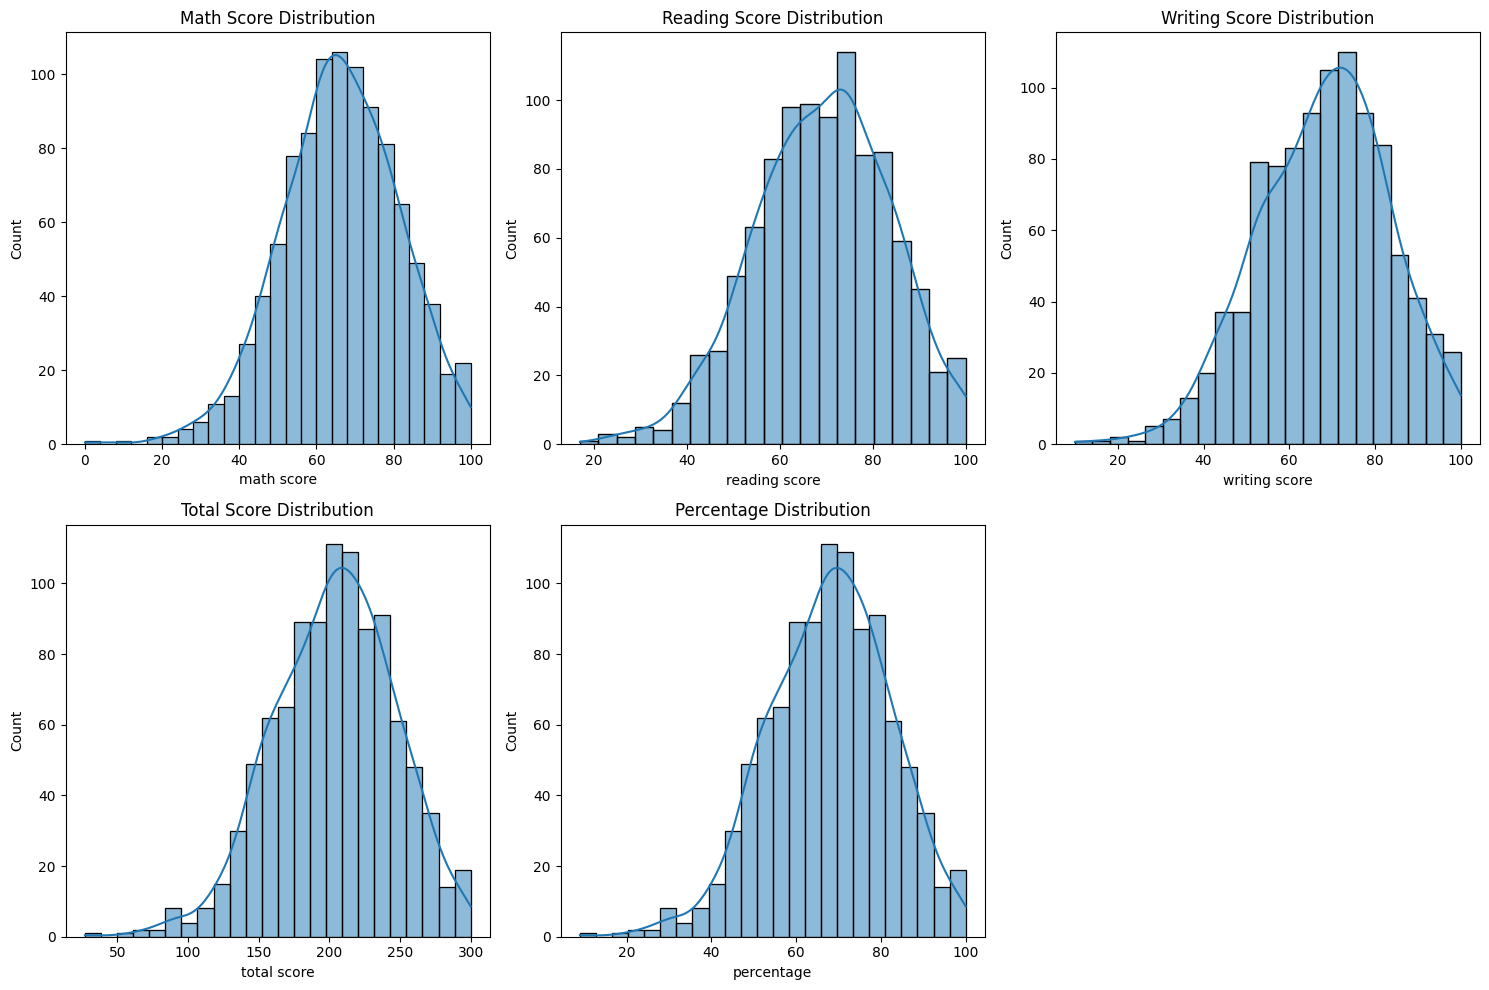

In [153]:
# 5.1 Distribution of Numerical Features
plt.figure(figsize=(15, 10))

# Math Score Distribution
plt.subplot(2, 3, 1)
sns.histplot(performance_df['math score'], kde=True)
plt.title('Math Score Distribution')

# Reading Score Distribution
plt.subplot(2, 3, 2)
sns.histplot(performance_df['reading score'], kde=True)
plt.title('Reading Score Distribution')

# Writing Score Distribution
plt.subplot(2, 3, 3)
sns.histplot(performance_df['writing score'], kde=True)
plt.title('Writing Score Distribution')

# Total Score Distribution
plt.subplot(2, 3, 4)
sns.histplot(performance_df['total score'], kde=True)
plt.title('Total Score Distribution')

# Percentage Distribution
plt.subplot(2, 3, 5)
sns.histplot(performance_df['percentage'], kde=True)
plt.title('Percentage Distribution')

plt.tight_layout()
plt.show()

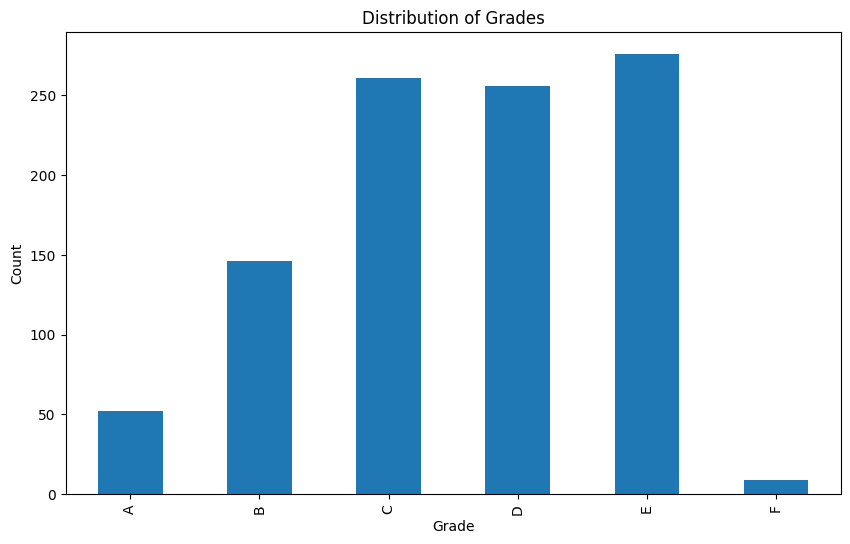

In [170]:
# Grade Distribution
# Distribution of grades
plt.figure(figsize=(10, 6))
performance_df['grade'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


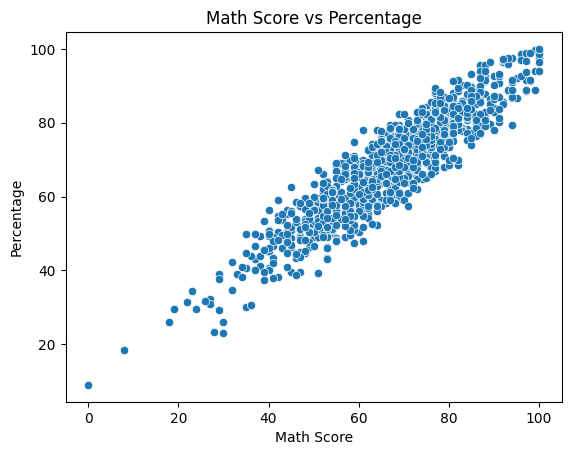

In [165]:
sns.scatterplot(data=performance_df,x='math score',y='percentage')
plt.title('Math Score vs Percentage')
plt.xlabel('Math Score')
plt.ylabel('Percentage')
plt.show()

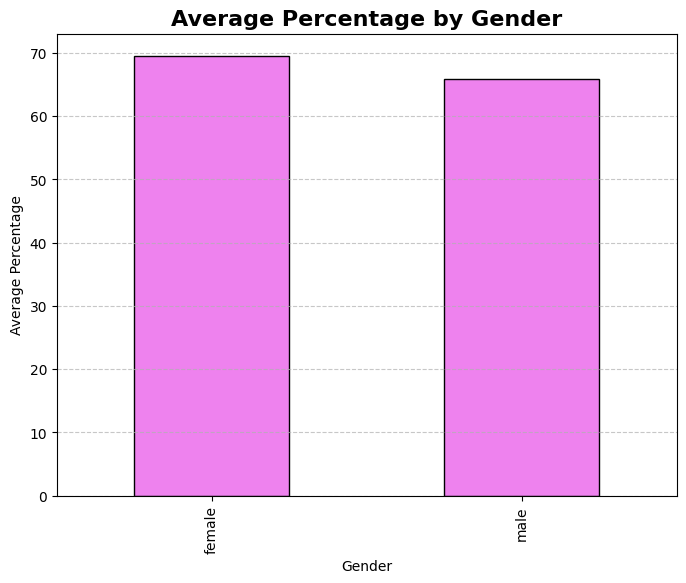

In [156]:
# distribution of marks with to gender
performance_df.groupby('gender')['percentage'].mean().plot(
    kind='bar',
    color='violet',
    figsize=(8,6),
    edgecolor='black'
)

plt.title('Average Percentage by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

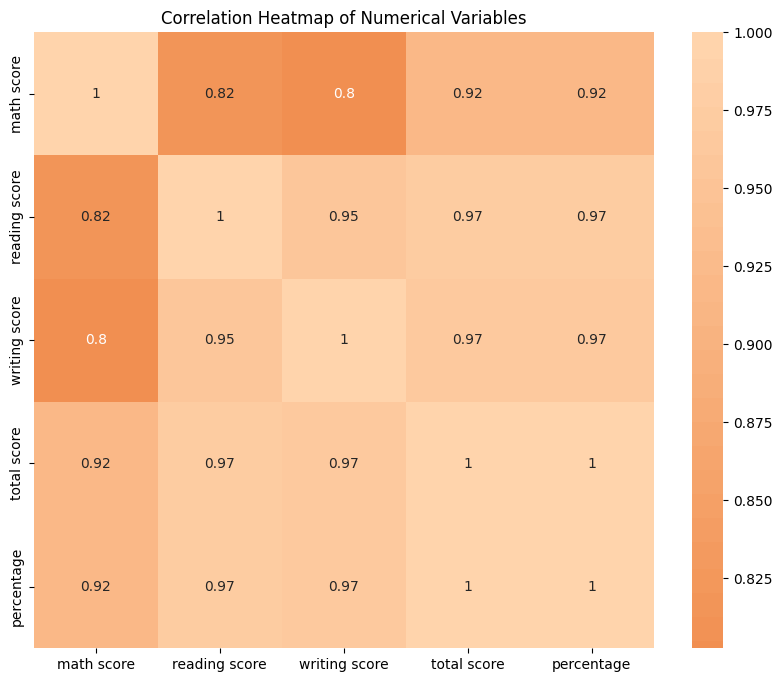

In [172]:
# heatmap
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['math score', 'reading score', 'writing score', 'total score', 'percentage']
sns.heatmap(performance_df[numeric_cols].corr(), annot=True, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

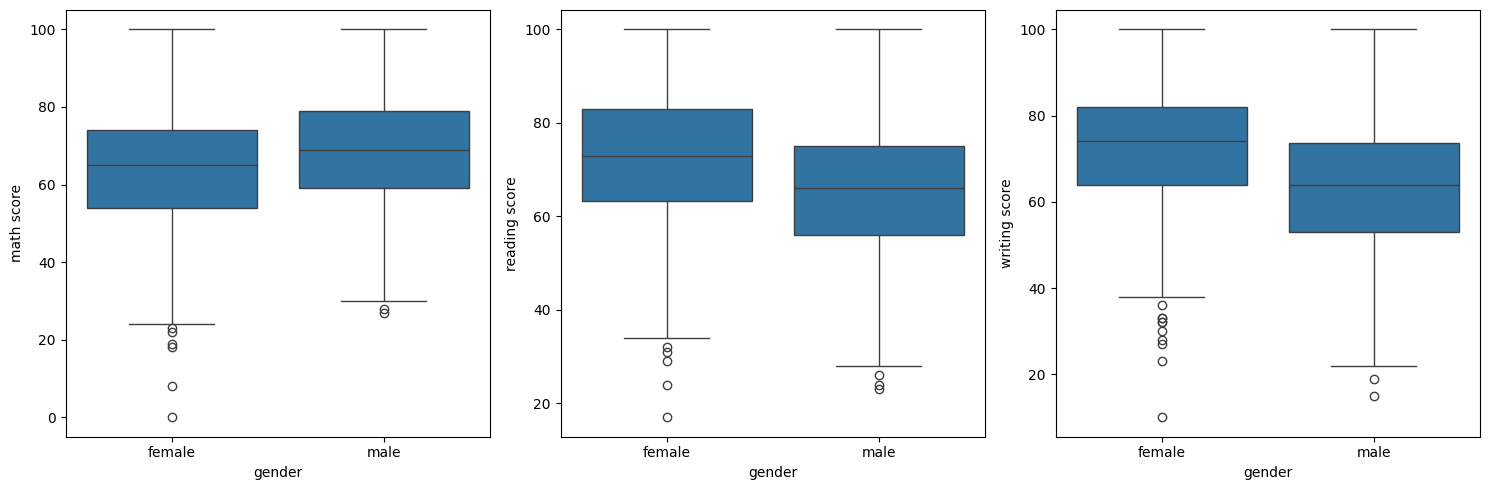

In [173]:
# Distribution of scores by gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=performance_df, x='gender', y='math score', ax=axes[0])
sns.boxplot(data=performance_df, x='gender', y='reading score', ax=axes[1])
sns.boxplot(data=performance_df, x='gender', y='writing score', ax=axes[2])
plt.tight_layout()
plt.show()

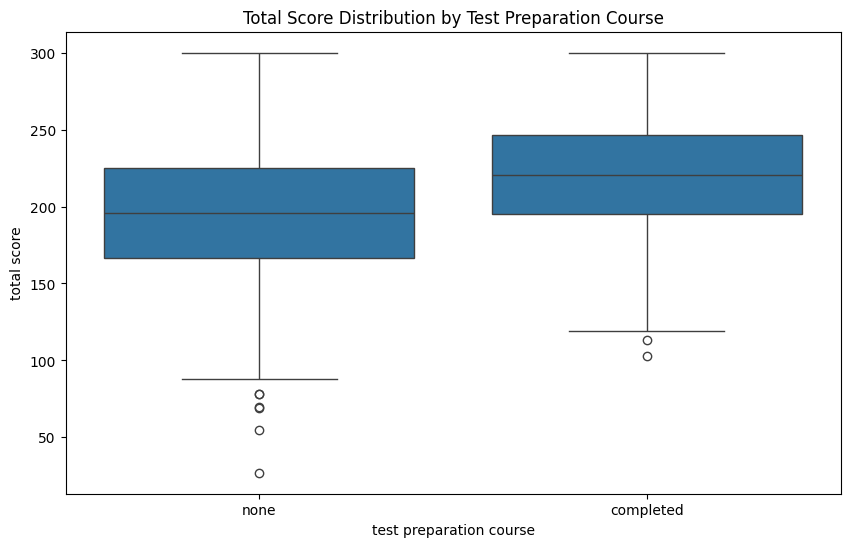

In [174]:
# Test preparation course impact
plt.figure(figsize=(10, 6))
sns.boxplot(data=performance_df, x='test preparation course', y='total score')
plt.title('Total Score Distribution by Test Preparation Course')
plt.show()

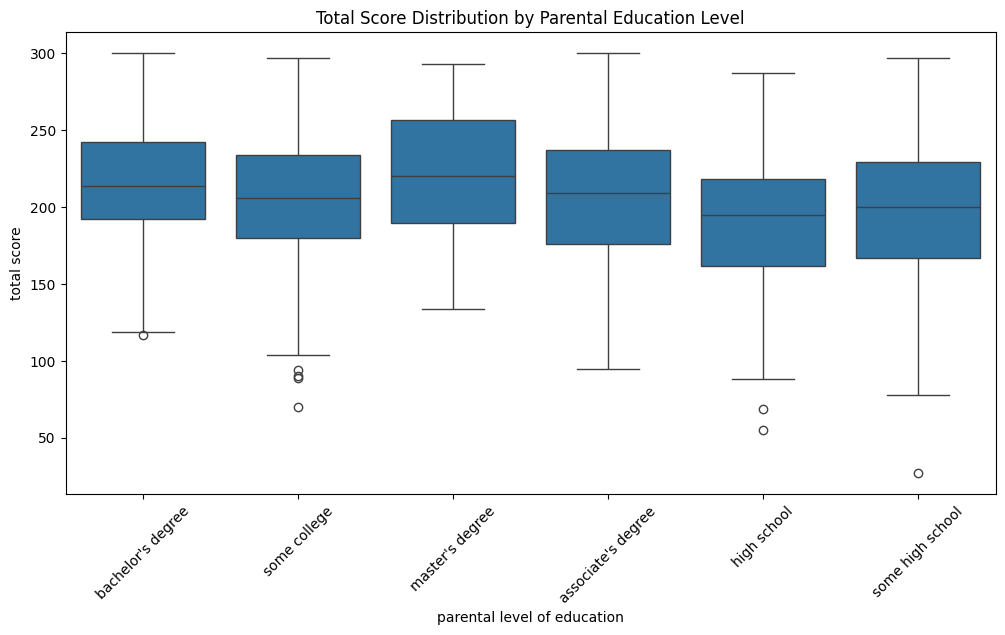

In [175]:
# Parental education impact
plt.figure(figsize=(12, 6))
sns.boxplot(data=performance_df, x='parental level of education', y='total score')
plt.xticks(rotation=45)
plt.title('Total Score Distribution by Parental Education Level')
plt.show()


### 6. Data Preprocessing for Model

In [179]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [180]:
# create binary target variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create binary target variable (pass/fail)
performance_df['pass_fail'] = (performance_df['percentage'] >= 40).astype(int)

# Encode categorical variables
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    performance_df[col] = le.fit_transform(performance_df[col])
    label_encoders[col] = le

# Select features and target
feature_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 
                'test preparation course', 'math score', 'reading score', 'writing score']

X = performance_df[feature_cols]
y = performance_df['pass_fail']


In [181]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Pass rate in training set: {y_train.mean():.2f}")
print(f"Pass rate in test set: {y_test.mean():.2f}")

Training set size: 800
Test set size: 200
Pass rate in training set: 0.97
Pass rate in test set: 0.95


### 7. Model Training

In [182]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9800
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.98      1.00      0.99       190

    accuracy                           0.98       200
   macro avg       0.99      0.80      0.87       200
weighted avg       0.98      0.98      0.98       200



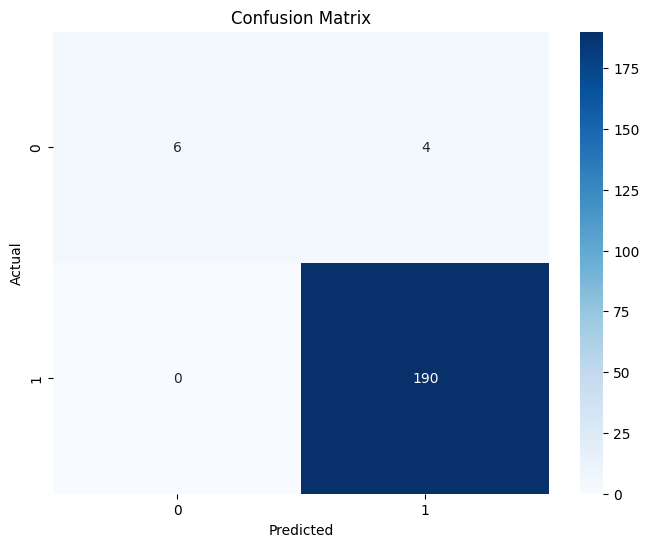

In [183]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

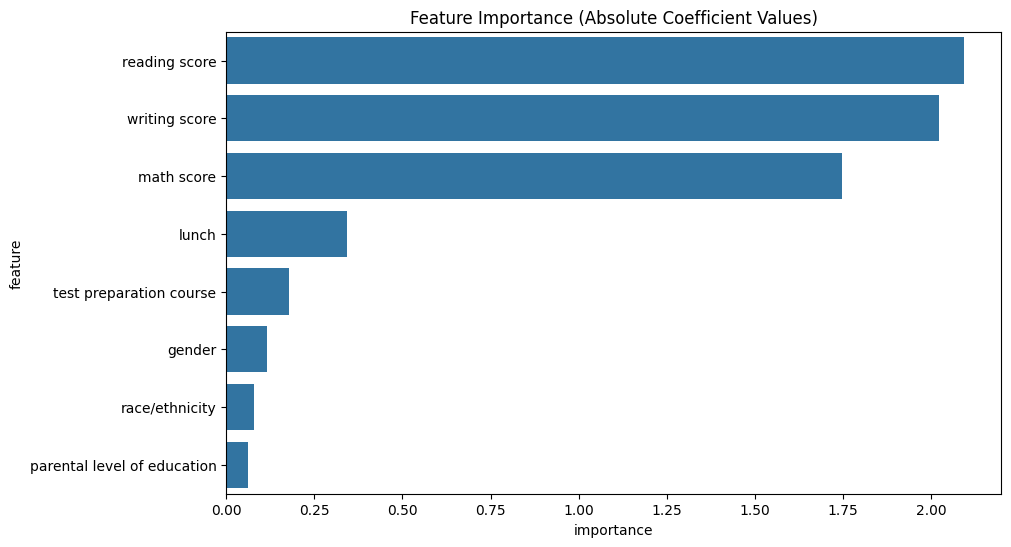

In [184]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': abs(logreg.coef_[0])
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.show()

In [185]:
### 8. Model Interpretation

# Display coefficients
coefficients = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': logreg.coef_[0]
}).sort_values('coefficient', ascending=False)

print("Feature Coefficients:")
print(coefficients)

# Analyze predictions vs actual
results_df = X_test.copy()
results_df['actual'] = y_test.values
results_df['predicted'] = y_pred
results_df['predicted_probability'] = y_pred_proba

print("\nSample Predictions:")
print(results_df.head(10))

Feature Coefficients:
                       feature  coefficient
6                reading score     2.093911
7                writing score     2.023183
5                   math score     1.748404
3                        lunch     0.342324
4      test preparation course     0.178987
2  parental level of education     0.062954
1               race/ethnicity    -0.077582
0                       gender    -0.115424

Sample Predictions:
     gender  race/ethnicity  parental level of education  lunch  \
521       0               2                            0      1   
737       0               1                            4      0   
740       1               3                            1      1   
660       1               2                            4      0   
411       1               4                            4      1   
678       1               3                            0      0   
626       1               1                            0      0   
513       0              